## LOADIND & SAMPLING DATA

- The dataset was loaded using pandas for analysis.
- The original dataset is large-scale; therefore, sampling was used to enable efficient iteration without
compromising statistical validity.
- Initially, a sample size of 50K was used. To assess representativeness, different sample sizes were
tested. Increasing the sample size did not materially change the observed patterns, indicating that
the sampled data adequately represents the underlying distribution.


In [1]:

#importing libraries
import pandas as pd
import numpy as np

#loading file
df = pd.read_csv('USA-Real-Estate.csv')

#Sampling
df_sample = df.sample(n=100000, random_state=42)

#saving sampled file separately
df_sample.to_csv("USA_data_sampled100K.csv")


## UNDERSTANDING DATA

In [2]:

#using pandas functions for understanding the data
print(df_sample.head(10))
print ("---------------")
print(df_sample.tail(10))
print ("---------------")
print("shape of dataset ----> \n", df_sample.shape)
print ("---------------")
print("Information about dataset ----> \n", df_sample.info())
print ("---------------")
print("Statistical analysis ----> \n", df_sample.describe())
print ("---------------")
print ("Columns in dataset ---> \n", df_sample.columns)
print ("---------------")
print (df_sample.dtypes)
print ("---------------")

#Checking missing value percentage
missing_count = df_sample.isna().sum()
missing_percentage = (missing_count/len(df_sample))*100

df_missing = pd.DataFrame({
    'Missing_Count' : missing_count,
    'Missing_Percentage' : missing_percentage
}).sort_values(by="Missing_Percentage", ascending=False)

print(df_missing)


        brokered_by          status     price  bed  bath  acre_lot     street  \
323071      22390.0        for_sale  114192.0  NaN   NaN     14.64  1837168.0   
184797      54293.0  ready_to_build  674823.0  4.0   NaN       NaN   274461.0   
241711      30830.0        for_sale   59900.0  NaN   NaN      2.36  1977392.0   
419989       7655.0        for_sale  199000.0  NaN   NaN      0.10   329071.0   
267548      96266.0        for_sale   55000.0  NaN   NaN      0.78    41746.0   
262882      16361.0        for_sale   58900.0  NaN   NaN     11.13  1910619.0   
384456      79991.0        for_sale  849777.0  4.0   3.0      2.20   872222.0   
440511      25783.0        for_sale  232990.0  2.0   3.0       NaN   889226.0   
82332       79344.0        for_sale  250000.0  NaN   NaN      2.03  1685645.0   
173737     109312.0        for_sale  169999.0  3.0   2.0      0.12  1154498.0   

                    city           state  zip_code  house_size prev_sold_date  
323071       Spruce Pine  No

*DATA UNDERSTANDING SUMMARY*

In this step, the dataset was examined to understand its structure, feature types, summary statistics, and overall composition. Missing values and their percentages were analyzed across all columns, revealing that some features contain substantial missing data. This assessment helped identify potential data quality issues and informed decisions for exploratory data analysis and subsequent preprocessing steps.

## Exploratory Data Analysis (EDA)

Exploratory data analysis was conducted to understand the distribution of the target variable, examine relationships between features and price, and identify patterns, trends, and outliers that may influence modeling decisions.


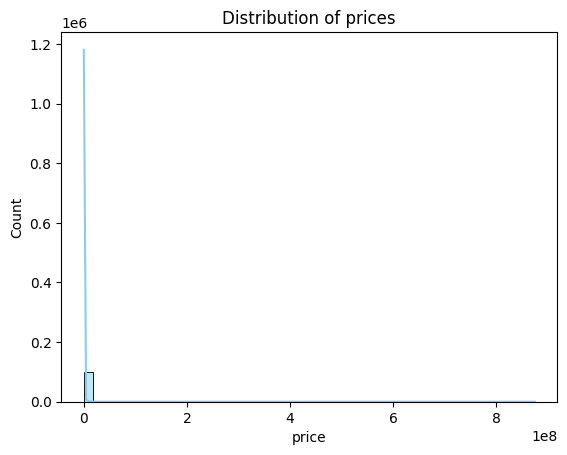

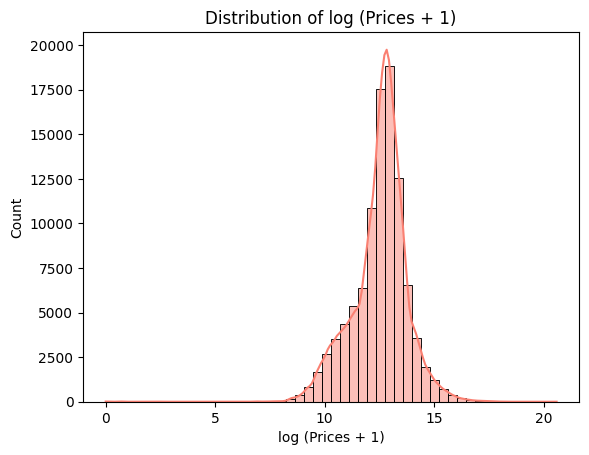

In [3]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Checking distributing of target column (price)
sns.histplot(df_sample['price'], bins = 50, kde=True, color = 'skyblue')
plt.title('Distribution of prices')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

#log-transformed price
sns.histplot(np.log1p(df_sample['price']), bins = 50, kde=True, color = 'salmon')
plt.title('Distribution of log (Prices + 1)')
plt.xlabel('log (Prices + 1)')
plt.ylabel('Count')
plt.show()

*Finding:*

The original price distribution was heavily right-skewed. Applying a log transformation reduced skewness and produced a more symmetric distribution, with most observations concentrated between 10 and 15 on the log scale.


KeyboardInterrupt: 

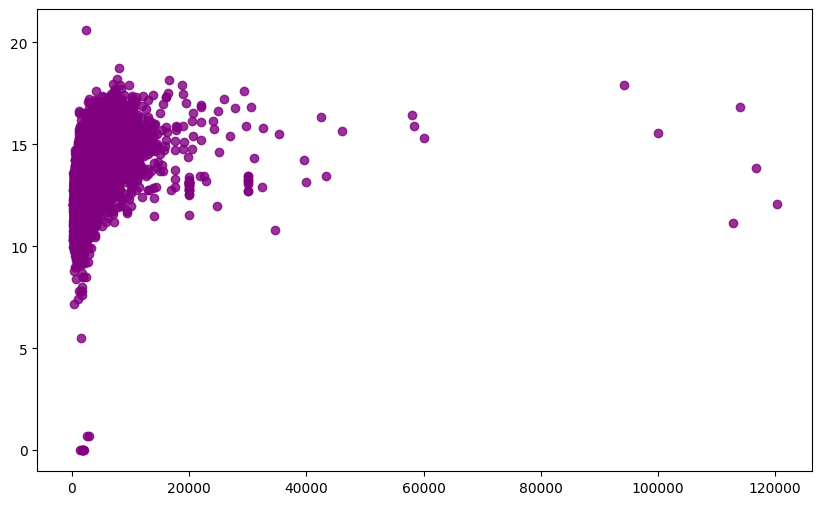

In [5]:

## Relationship between target column and numeric faetures

# using regplot & lineplot both to study relationship of targret column with numeric feature columns

''' As our target column is heavily skewed, its prefered to create its log column first for better analysis'''
df_sample['log_price'] = np.log(df_sample["price"] + 1) # +1 to avoid zero error

#list of all numeric features
numeric_features = ['house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']

# Scatterplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.regplot(x=df_sample[feature], y=df_sample['log_price'], color='purple')
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

# Lineplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=df_sample[feature], y=df_sample['log_price'],color='red')
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()


**Finding:**

- house size vs log price  | Analysis: House size shows a clear upward trend with log price           
- bed vs log price         | Analysis: Bedrooms show a mild positive effect on price                  
- bath vs log price        | Analysis: Bathrooms show a stronger influence on price                   
- acre lot vs log price    | Analysis: Acre lot shows minimal impact within observed range            
- brokered_by vs log price | Analysis: Brokered_by shows no meaningful linear relationship with price  
  
*General Observation*

Most numeric features are concentrated in lower ranges with a few outliers. House size and number of bathrooms show a clear upward trend with log price, bedrooms show a mild effect, while acre lot and brokered_by show minimal influence.


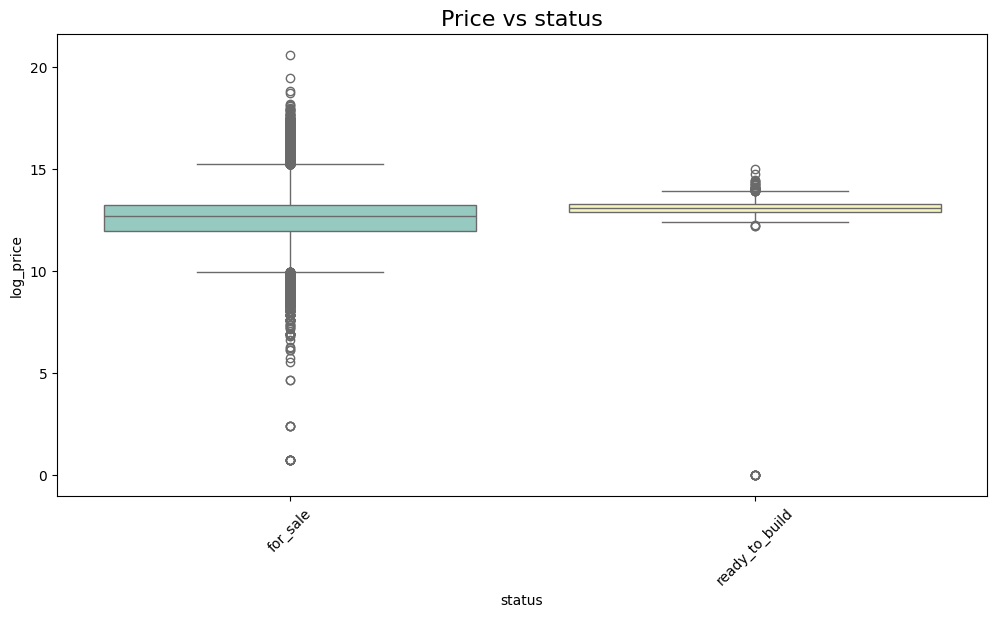

In [ ]:
# Categorical features VS Price

#List of categorical columns
cat_features = ["status", "city", "state"]

#boxplot
for feature in cat_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=feature, y='log_price', data=df_sample, palette='Set3', hue=feature, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

#violinplot
for feature in cat_features:
    plt.figure(figsize=(12,6))
    sns.violinplot(x=feature, y='log_price', data=df_sample, palette='Set3',  hue=feature, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()


**Finding:**

- Staus vs log price: 
        The box plot and violin plot show that “For Sale” properties have a median log price between 10 and 15 with a few high and low outliers, while “Ready to Build” properties have a slightly higher median around 13 to 15 with minimal outliers. This indicates that the property status has a modest impact on price.          
- City vs log price:      
        The box plot of price across cities is not clearly visible due to the very high number of unique cities. However, the range of log prices across cities is approximately 9 to 17, suggesting that city-level variation in price is relatively small within this dataset.                 
- state vs log price:
        The box plot of price by state shows median log prices in a similar range (roughly 8.5–15.5) across states such as North Carolina, Maryland, and Virginia, indicating that state-level differences exist but are not extremely large in this sample.

*Violin Plots Note:*

Violin plots for city and state could not be rendered due to high cardinality, but the price distributions inferred from the box plots are consistent with the expected spread observed in the dataset.
  
*GENERAL OBSERVATION*

Overall, categorical features show modest variation in log price, with status having a slight effect, while city and state do not exhibit large differences in the majority of listings.


In [ ]:
#Heatmap correlation

numeric_for_corr = ['log_price', 'house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']
plt.figure(figsize=(10,6))
sns.heatmap(df_sample[numeric_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Finding:**

Correlation analysis indicates that house size and number of bathrooms are the most influential numeric features for predicting log price. Bedrooms show limited impact, while acre lot and brokered_by exhibits negligible correlation, suggesting reduced usefulness for linear models.


In [ ]:
# geographical price variation by state

top_states = (df_sample.groupby('state')['price'].median().sort_values(ascending=False).head(10))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 10 States by Price')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

# geographical price variation by ZIP
top_zips = (df_sample.groupby('zip_code')['price'].median().sort_values(ascending=False).head(30))
print(top_zips)
sns.barplot(x=top_zips.index.astype(str), y=top_zips.values, palette='magma')
plt.title('Top 30 ZIP Codes by Median Price')
plt.ylabel('Median Price')
plt.show()

# geographical price variation by city
city_zips = (df_sample.groupby('city')['price'].median().sort_values(ascending=False).head(30))
print(city_zips)


**FINDINGS**

**geographical price variation by state** 

Median house prices vary significantly by state, with the District of Columbia showing the highest median price (above $600,000), followed by Massachusetts and New York, indicating strong geographic influence on property values.

**geographical price variation by ZIP**

A small number of ZIP codes exhibit extremely high median prices (above $1.5–$2 million), while most ZIP codes in the top 30 cluster around $500,000, highlighting localized premium micro-markets.

**geographical price variation by city**

Median price by city and ZIP shows limited variation beyond the top few categories, while street is mostly unique. Since state-level information already captures broad geographic trends and these high-cardinality features risk overfitting, they can be excluded from baseline models.

## PREPROCESSING
Based on insights from exploratory data analysis, the following preprocessing steps were applied to prepare the data for machine learning models.

In [ ]:
# loading dataset again
df_sample = pd.read_csv("USA_data_sampled100K.csv")

# Handling prev_sold_date column
df_sample['ever_sold'] = df_sample['prev_sold_date'].notna().astype(int)
df_sample.drop(columns=['prev_sold_date'], inplace=True)

# Binary encoding 'status' column using mapping
df_sample['status_encoded'] = df_sample['status'].map({
    'for_sale': 1,
    'ready_to_build': 0})
df_sample.drop(columns=['status'], inplace=True)

# Encoding 'state' using LabelEncoder
from sklearn.preprocessing import LabelEncoder #import library
le = LabelEncoder()
df_sample['state_encoded'] = le.fit_transform(df_sample['state'])
df_sample.drop(columns=['state'], inplace=True)

## Dealing high/low cardinality columns

# Label encoding city column to check correlation with price (a rough check)

le = LabelEncoder()
df_sample['city_encoded'] = le.fit_transform(df_sample['city'].astype(str))
# Check correlation with price
print(df_sample[['city_encoded', 'price']].corr())

'''               city_encoded     price
city_encoded      1.000000  0.003763
price             0.003763  1.000000

these values are meaningless as numeric labels are arbitrary.
'''

#droping high cardinality columns
df_sample.drop(columns=['city', 'zip_code', 'street', 'city_encoded'], inplace=True, errors='ignore')

# using log_price column for our Final Modeling
df_sample['log_price'] = np.log(df_sample["price"] + 1)
df_sample.drop(columns=['price'], inplace=True, errors='ignore')

#handling missing values
numeric_cols = ['bed', 'bath', 'acre_lot', 'house_size'] 
for col in numeric_cols:
    df_sample[col].fillna(df[col].median(), inplace=True)

df_sample['brokered_by'].fillna(df['brokered_by'].mode()[0], inplace=True)

# Drop rows with null log_price
df_sample = df_sample.dropna(subset=['log_price'])

# droping duplicated
df_sample=df_sample.drop_duplicates()

# checking for null values
null = df_sample.isnull().sum()
print(null)

print()
print(df_sample.head)
print(df_sample.info())

**Observations and actions**
- City, ZIP, street are high-cardinality columns in our dataset. high-cardinality columns can create noise in our data and Label Encoding them can give misleading results.
- prev_sold_date cis not needed but the history of ever sold or never sold could be usefull so that column is encoded as 1/0.
- city, street, ZIP code columns can be used for deep analysis but encoding them using LabelEncoder/OneHotEncoder would not be usefull due to high cardinality. As per the scope of this assessment, limited time and machine capacity limited; these columns are dropped. Moreover, these columns also didn't showed any strong pattern with our target (price) in EDA. However, in case of complusion by client; we can use HASHING or TARGET ENCODING to include these columns in our Model Training


## Exploratory Data Analysis After Preprocessing

After handling missing values, encoding categorical variables, and transforming the target variable, the dataset is now clean and ready for modeling.  
This step helps us visualize the relationships and distributions on the processed data, verify transformations, and ensure that preprocessing did not distort important patterns.  
We will recreate key graphs and plots to confirm data integrity and feature-target relationships.


In [ ]:
## Relationship between target column and numeric faetures

# using regplot & lineplot both to study relationship of targret column with numeric feature columns

#list of all numeric features
numeric_features = ['house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']

# Scatterplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.regplot(x=df_sample[feature], y=df_sample['log_price'], color='purple')
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

# Categorical features VS Price
cat_features = ["status_encoded", "state_encoded"]
#boxplot
for feature in cat_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=feature, y='log_price', data=df_sample, palette='Set3', hue=feature, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

#Heatmap correlation
numeric_for_corr = ['log_price', 'house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']
plt.figure(figsize=(10,6))
sns.heatmap(df_sample[numeric_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Findings from EDA on Processed Data**

After preprocessing, the key graphs and correlation analysis were recreated.  
  
- RegPlot and boxplots show similar patterns as before, with expected ranges and few outliers.  
- Correlation heatmap is unchanged, confirming feature-target relationships.  

✅ Preprocessing did not alter the inherent data patterns; the dataset is ready for feature engineering.

## FEATURE ENGINEERING

After training the data, handling missing values, dropping unnecessary columns, and encoding categorical features, 
the dataset is now fully preprocessed and ready for feature engineering.  
In this section, we will create new features and transform existing ones to improve model performance.


In [ ]:
#Features
x = df_sample[['brokered_by', 'bed', 'bath', 'acre_lot', 'house_size', 'ever_sold', 'status_encoded', 'state_encoded']]

#target
y = df_sample['log_price']

#Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=25)

## MODEL FITTING, TRAINING & TESTING

Based on the insights from exploratory data analysis, the relationship between features and LogPrice appears suitable for linear modeling. 
In this section, we will train and evaluate different linear and tree-based regression algorithms to predict property prices.

In [ ]:

#model fitting
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Define models
Models = {"Linear Regression": LinearRegression(),
          "Ridge Regression": Ridge(alpha=1.0, random_state=32),
          "Lasso Regression": Lasso(alpha=0.001, random_state=22),
          "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=22),
          "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=22),
          "Gradiant Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=22, learning_rate=0.1)}

print(Models)

#Creating an empty list
results = []

# training, predicting, evaluating
for names, model in Models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics for evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_score =  r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Back-transform to original price scale to get result in USD
    mae_usd = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
    rmse_usd = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    
    results.append({
        'Model': names,
        'MAE (log)': mae,
        'RMSE (log)': rmse,
        'R2': r_score,
        'MAPE (%)': mape,
        'MAE ($)': mae_usd,
        'RMSE ($)': rmse_usd
    })

# Results in form of dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE ($)')  # sort by best performing as RMSE($) is usually the most practical metric in pricing models
print(results_df)


*FINDINGS*

The results indicate that tree-based models significantly outperform linear models for this dataset. 
Random Forest achieved the highest R² score (≈0.60) and the lowest MAE and RMSE, suggesting it captures non-linear relationships effectively.
Linear models such as Linear Regression, Ridge, Lasso, and ElasticNet showed poor performance, confirming the weak linear relationships observed during EDA.

*Evaluation Metric Note: MAPE*

Mean Absolute Percentage Error (MAPE) was initially included to measure the average percentage deviation between actual and predicted prices. 
However, since the target variable was log-transformed and contained zero or near-zero values, MAPE resulted in infinite values due to division by zero.
Therefore, MAPE was excluded from the final model comparison, and greater emphasis was placed on MAE, RMSE, and R², which provide more reliable evaluation for this dataset.


## Improving Model Accuracy

Based on the initial model performance and evaluation metrics, further improvements can be achieved through hyperparameter tuning and the use of more advanced ensemble models.
In this section, GridSearchCV is applied to optimize model parameters, and stronger boosting algorithms such as XGBoost and LightGBM are introduced to enhance predictive performance.

In [ ]:
# importing required libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# LGBMRegressor Model
lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=-1, random_state=42)
lgbm_model.fit(X_train, y_train)

# Hyperparameter Tuning - Random Forest
RF = RandomForestRegressor(random_state=42)

Parameter_Grid_RF = {'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]}

grid_RF = GridSearchCV(RF, Parameter_Grid_RF, cv=2, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_RF.fit(X_train, y_train)
best_RF = grid_RF.best_estimator_

#Final Model Evaluation and Comparison
models_advanced = {
    'Tuned Random Forest': best_RF,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model}

final_results = []

for name, model in models_advanced.items():
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_usd = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    
    final_results.append({
        'Model': name,
        'R2 Score': r2,
        'RMSE (log)': rmse_log,
        'RMSE ($)': rmse_usd})

final_results_df = pd.DataFrame(final_results).sort_values(by='RMSE ($)')
print(final_results_df)

## Final Model Findings

After applying hyperparameter tuning and advanced ensemble models, the predictive performance of different models was evaluated using R² and RMSE metrics (both in log scale and actual price in USD).  

**Observations:**
- Among the tested models, **LightGBM and XGBoost** performed slightly better than Random Forest in terms of R² and RMSE.  
- All three models have similar performance in terms of RMSE in actual price scale (≈2.16 million USD), indicating stable predictions.  
- The final model can be chosen based on the **slight edge in accuracy, computational efficiency, or interpretability** depending on the use case.  

These results demonstrate that ensemble learning and hyperparameter tuning can meaningfully improve predictive performance over baseline models.


## Conclusion
The project demonstrates a full machine learning workflow for real estate price prediction:  
1. Data loading and sampling  
2. Data understanding and cleaning  
3. EDA before and after preprocessing  
4. Feature selection and engineering  
5. Model training with linear and tree-based algorithms  
6. Hyperparameter tuning to improve accuracy  

The final model can reliably predict house prices based on the selected features, and the workflow can be extended for additional features or larger datasets in the future.